In [ ]:

!apt-get install sox ffmpeg libcairo2 libcairo2-dev
!apt-get install texlive-full
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab_Notebooks/perturbation_metric_test
!pip install anndata
!pip install git+https://github.com/theislab/scgen.git
!pip install matplotlib
!pip install scanpy
!pip install pertpy
# need to run this block twice


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcairo2 is already the newest version (1.16.0-4ubuntu1).
libcairo2 set to manually installed.
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libmount1
  libopencore-amrnb0 libopencore-amrwb0 libpixman-1-dev libselinux1-dev
  libsepol1-dev libsox-fmt-alsa libsox-fmt-base libsox3 libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libsox-fmt-all
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libopencore-amrnb0
  libopencore-amrwb0 libpixman-1-dev libselinux1-dev li

In [ ]:
import anndata
import scanpy as sc
import scgen
import pandas as pd
import numpy as np
import pertpy as pt
import matplotlib.pyplot as plt
import seaborn as sns

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


To use sccoda or tasccoda please install ete3 with pip install ete3

In [ ]:
train = sc.read("./data/PapalexiSatija2021_eccite_RNA.h5ad")
sc.pp.normalize_total(train, target_sum=1e4)
sc.pp.log1p(train)
sc.pp.highly_variable_genes(train, n_top_genes=100, subset=True, min_mean=.1)
sc.pp.pca(train, use_highly_variable=True)

In [ ]:
df = pd.DataFrame({'numbers': [1, 2, 3, 4, 5]})
df['numbers'].map(lambda x: x**2)


0     1
1     4
2     9
3    16
4    25
Name: numbers, dtype: int64

In [ ]:
train.obs_keys



<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 20729 × 100
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo'
    var: 'ensembl_id', 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'>

In [ ]:
train.obs

,hto,guide_id,hto_barcode,gdo_barcode,perturbation,tissue_type,cell_line,cancer,disease,perturbation_type,celltype,organism,nperts,ngenes,ncounts,percent_mito,percent_ribo
AAACCTGAGCCAGAAC,rep1-tx,STAT2g2,AGGACCATCCAA,CTTCGTGTACGGTTGCACA,STAT2g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,3942,17207.0,2.295577,14.714942
AAACCTGAGTGGACGT,rep1-tx,CAV1g4,AGGACCATCCAA,GTCTACGTATTTGCCCCCA,CAV1g4,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2948,9506.0,4.512939,9.877972
AAACCTGCATGAGCGA,rep1-tx,STAT1g2,AGGACCATCCAA,CATCCTTTGGTACAACATG,STAT1g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,4258,15256.0,4.116413,13.227583
AAACCTGTCTTGTCAT,rep1-tx,CD86g1,AGGACCATCCAA,ATTCCTTGGATTACAGCTG,CD86g1,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,1780,5135.0,5.491723,21.888997
AAACGGGAGAACAACT,rep1-tx,IRF7g2,AGGACCATCCAA,CCAGTACACCTTGCACTTG,IRF7g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2671,9673.0,3.359868,13.263724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCACTTCC,rep3-tx,CMTM6g1,AGGACCATCCAA,CGTAGTGGGGCTGTACACC,CMTM6g1,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,4884,20863.0,5.469012,13.914586
TTTGTCAGTGACGGTA,rep4-tx,NTg4,TCGATAATGCGA,TGCGACGCTTAGCCTCCGT,control,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,0,3787,17553.0,2.159175,7.673902
TTTGTCAGTTCCACAA,rep3-tx,ATF2g1,AGGACCATCCAA,TTCATTTCTCAGCAGGGTG,ATF2g1,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,4185,15106.0,2.661194,14.338673
TTTGTCATCACGCATA,rep3-tx,CAV1g2,AGGACCATCCAA,GTCATCGTTGAGGTGTTTA,CAV1g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,3204,11209.0,7.369078,10.036578


In [ ]:
train.obs_names

Index(['AAACCTGAGCCAGAAC', 'AAACCTGAGTGGACGT', 'AAACCTGCATGAGCGA',
       'AAACCTGTCTTGTCAT', 'AAACGGGAGAACAACT', 'AAACGGGAGACAGAGA',
       'AAACGGGAGCGCTTAT', 'AAACGGGGTAAGGGAA', 'AAACGGGGTTGTACAC',
       'AAACGGGTCGGATGTT',
       ...
       'TTTGGTTTCGACCAGC', 'TTTGTCAAGACTTGAA', 'TTTGTCAAGCGATTCT',
       'TTTGTCAAGTTACGGG', 'TTTGTCAGTAGGCATG', 'TTTGTCAGTCACTTCC',
       'TTTGTCAGTGACGGTA', 'TTTGTCAGTTCCACAA', 'TTTGTCATCACGCATA',
       'TTTGTCATCTGTACGA'],
      dtype='object', length=20729)

In [ ]:
filter=train[train.obs['perturbation'].map(train.obs['perturbation'].value_counts()) >= 500] #we filter out perturbation which has cells less than 500

In [ ]:
filter.obs.groupby("perturbation").groups

{'ATF2g1': ['ACACTGAGTGTTGGGA', 'ACGAGGATCTTGCAAG', 'ACGCAGCGTCTTGCGG', 'ACGGGCTTCCCGGATG', 'AGAGCGAGTTTGGCGC', 'AGGGTGAGTGTCGCTG', 'ATGGGAGCAATCTGCA', 'ATTCTACAGAGTGAGA', 'CACAAACAGAATGTGT', 'CAGCCGACATATGAGA', 'CAGCCGAGTTTACTCT', 'CATGACAAGAGTTGGC', 'CATGCCTGTGAAGGCT', 'CATGCCTTCCTATTCA', 'CATTATCCATTAGCCA', 'CCAATCCTCTGACCTC', 'CCGTACTCAATGAAAC', 'CCTACACAGTCTCGGC', 'CGACTTCGTCACTTCC', 'CGAGAAGCAATCTGCA', 'CGAGCCATCGAACTGT', 'CGCTGGATCGTGGTCG', 'CGTGAGCAGTACGCCC', 'CTTAACTGTAGGAGTC', 'CTTAACTTCGCCTGTT', 'CTTAGGAAGCACCGCT', 'GACTACATCTAGCACA', 'GCAAACTGTTCCACAA', 'GCAGCCACATCAGTCA', 'GCATACAGTTCAGACT', 'GCTTCCAGTACGCACC', 'GGTATTGTCGGAAATA', 'GTCACGGCAAATTGCC', 'GTTCATTCATAGACTC', 'TACTTACTCGTATCAG', 'TAGACCACAAGCCTAT', 'TAGTGGTAGCACCGTC', 'TCATTACCAGTCACTA', 'TCGCGAGGTCTAGGTT', 'TCGCGTTAGAGACGAA', 'TCGGTAAAGAAAGTGG', 'TGGGCGTAGTTCGATC', 'TTCTCCTGTGCTCTTC', 'AAACCTGTCATTTGGG', 'AAAGTAGTCGCCAGCA', 'AACGTTGGTTTAGGAA', 'AAGGTTCCACGGACAA', 'ACGAGGACAAATTGCC', 'AGACGTTAGGCATGGT-1', 'ATCAT

In [ ]:
#list of stimulated
stim=train[train.obs['perturbation']!="control"]

filtered_obs = train.obs[train.obs['perturbation'].map(train.obs['perturbation'].value_counts()) >= 500]

list_stim=list(filtered_obs['perturbation'].unique())
df=train.obs



train.obs.groupby("perturbation").get_group('control')
# train.groupby("perturbation").apply()
train.obs.groupby("perturbation").size()
train.obs.groupby("perturbation").groups
#each perturbation left has 500 cells, and we subsample it to 100

groups=filter.obs.groupby("perturbation").apply(lambda x: x.sample(n=100, random_state=1,replace=False))





# anndata.concat([filter[x] for x in list(groups)], merge="same")
len(np.unique(list(groups)))-len(list(groups))

name=[]
for _,i in groups.index:
  name.append(i)
print(len(name))
 #hto is not unique identifier, obs_name is
new=filter[filter.obs_names.isin(name)]
new

300


View of AnnData object with n_obs × n_vars = 300 × 100
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo'
    var: 'ensembl_id', 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [ ]:


# obs_key = 'perturbation'
# etest = pt.tl.DistanceTest('edistance', n_perms=1000, obsm_key='X_pca', alpha=0.0015)

# contrast = 'control'
# tab = etest(train, groupby=obs_key, contrast=contrast)
# tab

Working... ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━  60% 0:59:47

In [ ]:
distance=pt.tools.Distance(metric='edistance')
pairwise_df = distance.pairwise(train, groupby='perturbation')
res=pairwise_df['control']# just take one row


Output()

In [ ]:
def generate(ncell, train):
  #we filter out perturbation which has cells less than 500
  filter=train[train.obs['perturbation'].map(train.obs['perturbation'].value_counts()) >= 500]
  #each perturbation left with 500 cells, and we subsample it to 100
  groups=filter.obs.groupby("perturbation").apply(lambda x: x.sample(n=ncell, random_state=1,replace=False))
  name=[]
  for _,i in groups.index:
    name.append(i)
  new=filter[filter.obs_names.isin(name)]
  return new


generate(10,train)

View of AnnData object with n_obs × n_vars = 30 × 100
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo'
    var: 'ensembl_id', 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'X_pca_predistances'

In [ ]:
experiment_condi = list([100,200,300])
metrics=list(["edistance",'pseudobulk','wasserstein','mmd'])


res_dict={"res":[],"metric":[],"condi":[]};
for metric in metrics:


  for ncell in experiment_condi:
    adata=generate(ncell,train)

    distance=pt.tools.Distance(metric=metric)
    pairwise_df = distance.pairwise(adata, groupby='perturbation')
    res=pairwise_df['control']# just take one row
    control=res['control']
    stim=(np.sum(res)-control)/(len(res)-1)# mean for stim
    res=np.absolute(control-stim)
    print(res)
    res_dict["res"].append(res)
    res_dict["metric"].append(metric)
    res_dict["condi"].append(ncell)


df=pd.DataFrame.from_dict(res_dict)
df



Output()

Output()

0.1442553997039795


Output()

0.10464954376220703


0.09655773639678955


Output()

0.6374790370464325


Output()

0.5507862418889999


Output()

0.5457007586956024


Output()

12.250795364379883


Output()

Output()

11.424317359924316


Output()

11.354352474212646


Output()

0.4699345678091049


Output()

0.3703359067440033


,res,metric,condi
0,0.144255,edistance,100
1,0.104650,edistance,200
2,0.096558,edistance,300
3,0.637479,pseudobulk,100
4,0.550786,pseudobulk,200
5,0.545701,pseudobulk,300
6,12.250795,wasserstein,100
7,11.424317,wasserstein,200
8,11.354352,wasserstein,300
9,0.469935,mmd,100


In [ ]:
# df.groupby('metric').groups
df.to_csv('metric_distance.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab_Notebooks/perturbation_metric_test
import pandas as pd
df2=pd.read_csv('metric_distance.csv')

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/perturbation_metric_test


In [ ]:
df2

,res,metric,condi
0,0.144255,edistance,100
1,0.104650,edistance,200
2,0.096558,edistance,300
3,0.637479,pseudobulk,100
4,0.550786,pseudobulk,200
5,0.545701,pseudobulk,300
6,12.250795,wasserstein,100
7,11.424317,wasserstein,200
8,11.354352,wasserstein,300
9,0.469935,mmd,100


In [ ]:
import numpy as np
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

res2=normalize_2d(new['res'])

0    0.711693
1    0.516295
2    0.476374
Name: res, dtype: float64

In [57]:
import itertools
metrics=list(["edistance",'pseudobulk','wasserstein','mmd'])
res2=[]
for m in metrics:
  new=df2[df2['metric']==m]
  res2.append(list(normalize_2d(new['res'])))


flat_res = [item for sublist in res2 for item in sublist]
flat_res

[0.711693245240593,
 0.5162952206011459,
 0.47637377117482776,
 0.6350910354777877,
 0.5487229922240182,
 0.5436565592913154,
 0.6053793608268522,
 0.5645385246857539,
 0.5610811738336121,
 0.6667660794591864,
 0.5285117004400353,
 0.5254506425732186]

In [61]:
df2=pd.read_csv('metric_distance.csv')
df2=pd.DataFrame(df2)
df2.loc[:,['res']]=flat_res


<Axes: xlabel='condi', ylabel='res'>

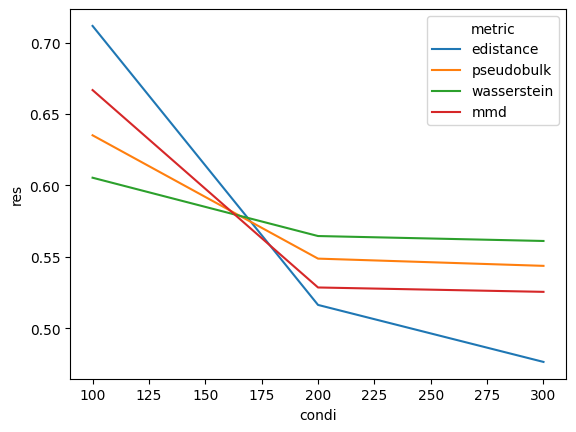

In [63]:
import seaborn as sns
sns.lineplot(data=df2, x="condi", y="res", hue="metric")